#PhlyGreen Tutorial 

Import packages

In [1]:
import sys
sys.path.append('../')
import PhlyGreen as pg
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

Create instances of subsystems. Each one of those requires an Aircraft object as argument. By passing (None) as argument, we are creating empty objects (for the moment).

In [2]:
powertrain = pg.Systems.Powertrain.Powertrain(None)
structures = pg.Systems.Structures.Structures(None)
aerodynamics = pg.Systems.Aerodynamics.Aerodynamics(None)
performance = pg.Performance.Performance(None)
mission = pg.Mission.Mission(None)
weight = pg.Weight.Weight(None)
constraint = pg.Constraint.Constraint(None)
welltowake = pg.WellToWake.WellToWake(None)
climateimpact = pg.ClimateImpact.ClimateImpact(None)

Create instance of Aircraft object.

In [3]:
myaircraft = pg.Aircraft(powertrain, structures, aerodynamics, performance, mission, weight, constraint, welltowake, climateimpact)

Create the connections with its subsystems.

In [4]:
powertrain.aircraft = myaircraft
structures.aircraft = myaircraft
aerodynamics.aircraft = myaircraft
mission.aircraft = myaircraft
performance.aircraft = myaircraft
weight.aircraft = myaircraft
constraint.aircraft = myaircraft
welltowake.aircraft = myaircraft
climateimpact.aircraft = myaircraft

Define input dictionaries

Constraints ordering:
[0] : cruise,
[1] : take-off,
[2] : climb,
[3] : turn,
[4] : ceiling,
[5] : acceleration,
[6] : landing 

In [5]:
ConstraintsInput = {'speed': np.array([0.4, 140, 170, 210, 0.5, 0.35, 104.]) ,
                    'speedtype': ['Mach','KCAS','KCAS','KCAS','Mach','Mach','KCAS']   ,
                    'beta': np.array([0.95,0.985,0.97, 0.9, 0.8, 0.9, None])   ,
                    'altitude': np.array([7000., 100., 6000., 5000, 9500., 6000, 500.]),
                    'load factor': np.array([1., None, 1., 1.1, 1., 1., None]),
                    'DISA': 0, 
                    'kTO': 1.2,
                    'sTO': 950,
                    'OEI Climb Gradient': 0.021,
                    'Rate of Climb': 5,  #5m/s ~= 1000 ft/min, 7.6 ~= 1500 ft/min
                    'ht': 0.5,
                    'M1': 0.3,
                    'M2': 0.4,
                    'DTAcceleration': 180}

In [6]:
MissionInput = {'Range Mission': 750,  #nautical miles
                'Range Diversion': 220,  #nautical miles
                'Beta start': 0.985,
                'Payload Weight': 4560,  #Kg
                'Crew Weight': 500}  #Kg

In [7]:
MissionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.12, 'Speed': 77, 'StartAltitude': 100, 'EndAltitude': 1500}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Climb2': {'type': 'ConstantRateClimb', 'input': {'CB': 0.06, 'Speed': 110, 'StartAltitude': 1500, 'EndAltitude': 4500}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Climb3': {'type': 'ConstantRateClimb', 'input': {'CB': 0.05, 'Speed': 110, 'StartAltitude': 4500, 'EndAltitude': 7000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.45, 'Altitude': 7000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 7000, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

DiversionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.06, 'Speed': 110, 'StartAltitude': 200, 'EndAltitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.2, 'Altitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 3100, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

In [8]:
EnergyInput = {'Ef': 43.5*10**6,
                   'Eta Gas Turbine Model': 'PW127',
                   #'Eta Gas Turbine': 0.22,
                   'Eta Gearbox': 0.96,
                   'Eta Propulsive Model': 'constant',
                   'Eta Propulsive': 0.75,
                   'Specific Power Powertrain': [3900,0]  # W/Kg
                   }

In [9]:
AerodynamicsInput = {'NumericalPolar': {'type': 'ATR42'}}

In [10]:
ClimateImpactInput = {'H': 100, 'N':497*50, 'Y':30, 'EINOx_model':'Filippone'}

Import input dictionaries

In [11]:
myaircraft.ConstraintsInput = ConstraintsInput
myaircraft.AerodynamicsInput = AerodynamicsInput
myaircraft.MissionInput = MissionInput
myaircraft.MissionStages = MissionStages
myaircraft.DiversionStages = DiversionStages
myaircraft.EnergyInput = EnergyInput
myaircraft.ClimateImpactInput = ClimateImpactInput

Set aircraft power configuration

In [12]:
myaircraft.Configuration = 'Traditional'

Set inputs

In [13]:
# Initialize Constraint Analysis
myaircraft.constraint.SetInput()

# Initialize Mission profile and Analysis
myaircraft.mission.InitializeProfile()
myaircraft.mission.SetInput()

# Initialize Aerodynamics subsystem
myaircraft.aerodynamics.SetInput()

# Initialize Powertrain
myaircraft.powertrain.SetInput()

# Initialize Weight Estimator
myaircraft.weight.SetInput()

# Initialize Climate Impact Estimator
myaircraft.climateimpact.SetInput()

Either run the Constraint Analysis....

In [14]:
myaircraft.constraint.FindDesignPoint()
print('----------------------------------------')
print('Design W/S: ',myaircraft.DesignWTOoS)
print('Design P/W: ',myaircraft.DesignPW)
print('----------------------------------------')

# ----------------------------------------
# Design W/S:  3328.8528528528527
# Design P/W:  168.51352203046332
# ----------------------------------------

----------------------------------------
Design W/S:  3328.8528528528527
Design P/W:  168.51352203046332
----------------------------------------


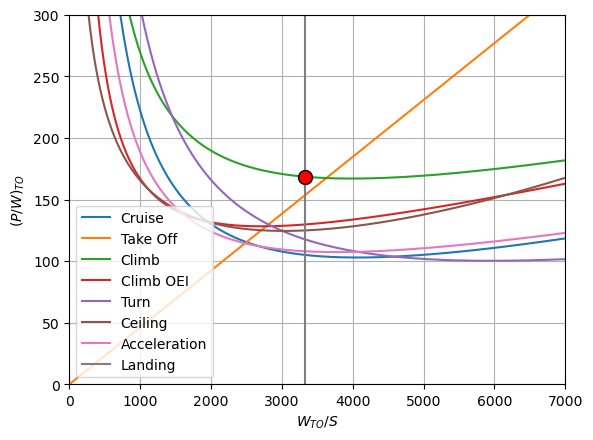

In [15]:
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCruise, label='Cruise')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTakeOff, label='Take Off')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWClimb, label='Climb')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWOEI, label='Climb OEI')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTurn, label='Turn')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCeiling, label='Ceiling')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAcceleration, label='Acceleration')
plt.plot(myaircraft.constraint.WTOoSLanding,myaircraft. constraint.PWLanding, label='Landing')
plt.plot(myaircraft.DesignWTOoS, myaircraft.DesignPW, marker='o', markersize = 10, markerfacecolor = 'red', markeredgecolor = 'black')
# plt.plot(performance.WTOoSTorenbeek, performance.PWTorenbeek, label='Torenbeek')
plt.ylim([0, 300])
plt.xlim([0, 7000])
plt.legend()
plt.grid(visible=True)
plt.xlabel('$W_{TO}/S$')
plt.ylabel('$(P/W)_{TO}$')
plt.show()

Run Mission analysis to define the aircraft's masses

In [16]:
myaircraft.weight.WeightEstimation()

Wing surface can be readily estimated as S = WTO/(WTO/S)

In [17]:
myaircraft.WingSurface = myaircraft.weight.WTO / myaircraft.DesignWTOoS * myaircraft.performance.g_acc 

A summary of the preliminary design:

In [18]:
print('----------------------------------------')
print('Fuel mass (trip + altn) [Kg]: ', myaircraft.weight.Wf)
print('Block Fuel mass [Kg]:         ', myaircraft.weight.Wf + myaircraft.weight.final_reserve)
print('Structure [Kg]:               ', myaircraft.weight.WStructure)
print('Powertrain mass [Kg]:         ',myaircraft.weight.WPT)
print('Empty Weight [Kg]:            ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew)
print('Zero Fuel Weight [Kg]:        ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.WPayload)
print('----------------------------------------')
print('Takeoff Weight [Kg]:          ', myaircraft.weight.WTO)
if myaircraft.WellToTankInput is not None:
    print('Source Energy: ', myaircraft.welltowake.SourceEnergy/1.e6,' MJ')
    print('Psi: ', myaircraft.welltowake.Psi)
print('Wing Surface [m^2]:           ', myaircraft.WingSurface)
print('TakeOff shaft peak power [kW]:      ', myaircraft.mission.TO_PP/1000.)
print('Climb/cruise shaft peak power [kW]: ', myaircraft.mission.Max_PEng/1000.)
print('Sizing phase for thermal powertrain: ', 'Climb/Cruise peak power' if myaircraft.mission.Max_PEng > myaircraft.mission.TO_PP else 'Takeoff peak power'  )
print('----------------------------------------')

# ----------------------------------------
# Fuel mass (trip + altn) [Kg]:  2133.2710778275346
# Block Fuel mass [Kg]:          2263.2710778275346
# Structure [Kg]:                10377.131056455126
# Powertrain mass [Kg]:          1024.617262840593
# Empty Weight [Kg]:             11901.748319295719
# Zero Fuel Weight [Kg]:         16461.74831929572
# ----------------------------------------
# Takeoff Weight [Kg]:           18724.985998968787
# Wing Surface [m^2]:            55.18180609649305
# TakeOff shaft peak power [kW]:       3996.007325078313
# Climb/cruise shaft peak power [kW]:  3325.9688771073147
# Sizing phase for thermal powertrain:  Takeoff peak power
# ----------------------------------------

----------------------------------------
Fuel mass (trip + altn) [Kg]:  2133.2710778275346
Block Fuel mass [Kg]:          2263.2710778275346
Structure [Kg]:                10377.131056455126
Powertrain mass [Kg]:          1024.617262840593
Empty Weight [Kg]:             11901.748319295719
Zero Fuel Weight [Kg]:         16461.74831929572
----------------------------------------
Takeoff Weight [Kg]:           18724.985998968787
Wing Surface [m^2]:            55.18180609649305
TakeOff shaft peak power [kW]:       3996.007325078313
Climb/cruise shaft peak power [kW]:  3325.9688771073147
Sizing phase for thermal powertrain:  Takeoff peak power
----------------------------------------


In [19]:
times = np.array([])
Ef = np.array([])
beta = np.array([])
for array in mission.integral_solution:
    times = np.concatenate([times, array.t])
    Ef = np.concatenate([Ef, array.y[0]])
    beta = np.concatenate([beta, array.y[1]])

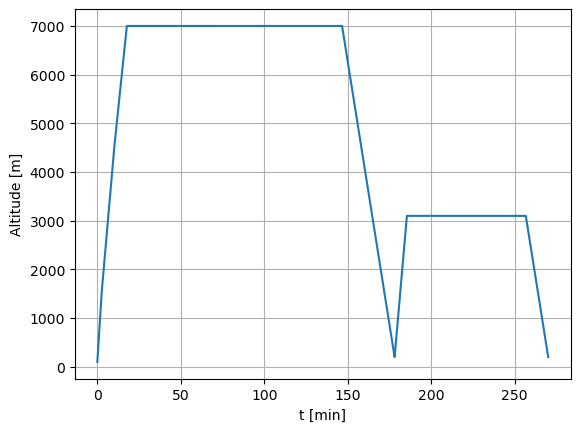

In [20]:
plt.plot(times/60,mission.profile.Altitude(times))
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Altitude [m]')
plt.show()

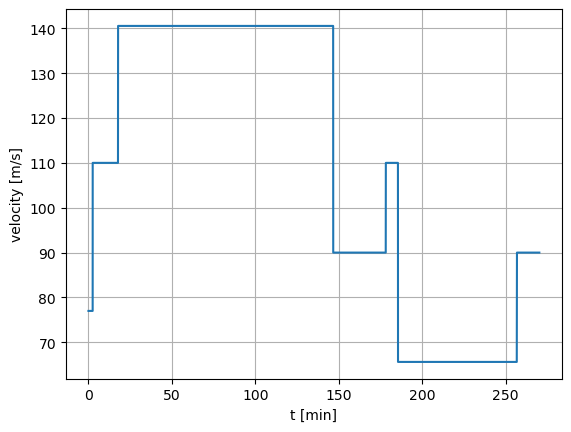

In [21]:
plt.plot(times/60,mission.profile.Velocity(times))
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('velocity [m/s]')
plt.show()

ClimateImpact Test

In [22]:
# alcune distanze in metri 

print('Lunghezze salite e discesa: ',myaircraft.mission.profile.Distances)
print('Lunghezze salita e discesa (diversione): ',myaircraft.mission.profile.DistancesDiversion)
# i due vettori raccolgono le distanze orizzontali percorse durante le varie salite e discese
print('range di missione (diversione esclusa): ',myaircraft.mission.profile.MissionRange)
print('range diversione: ', myaircraft.mission.profile.DiversionRange)
# lunghezza delle crociere [m]:
l_cruise = myaircraft.mission.profile.MissionRange - np.sum(myaircraft.mission.profile.Distances)  
l_dcruise = myaircraft.mission.profile.DiversionRange - np.sum(myaircraft.mission.profile.DistancesDiversion)

TotalRange = myaircraft.mission.profile.MissionRange + myaircraft.mission.profile.DiversionRange

# distanze [m] dal punto di partenza alle quali cominciano le varie fasi di volo
d_2c = myaircraft.mission.profile.Distances[0]  # seconda salita (la prima comincia da 0)
d_3c = d_2c + myaircraft.mission.profile.Distances[1]  # terza salita
d_cruise = d_3c + myaircraft.mission.profile.Distances[2]  # crociera
d_d = d_cruise + l_cruise  # discesa
d_dc = d_d + myaircraft.mission.profile.Distances[3]  # salita (diversione)
d_dcruise = d_dc + myaircraft.mission.profile.DistancesDiversion[0]  # crociera (diversione)
d_dd = d_dcruise + l_dcruise  # discesa (diversione)
d = np.array([0, d_2c, d_3c, d_cruise, d_d, d_dc, d_dcruise, d_dd, TotalRange])
print(d)
qf = np.array([
    myaircraft.MissionStages['Climb1']['input']['StartAltitude'],
    myaircraft.MissionStages['Climb2']['input']['StartAltitude'],
    myaircraft.MissionStages['Climb3']['input']['StartAltitude'],
    myaircraft.MissionStages['Cruise']['input']['Altitude'],
    myaircraft.MissionStages['Descent1']['input']['StartAltitude'],
    myaircraft.DiversionStages['Climb1']['input']['StartAltitude'],
    myaircraft.DiversionStages['Cruise']['input']['Altitude'],
    myaircraft.DiversionStages['Descent1']['input']['StartAltitude'],
    myaircraft.DiversionStages['Descent1']['input']['EndAltitude']
])

print('lunghezze di break tra le fasi: ',qf)    
print('lunghezza crociera: ', l_cruise)
print('lunghezza crociera di diversione: ', l_dcruise)

Lunghezze salite e discesa:  [11704.0, 50050.0, 50050.0, 170010.0]
Lunghezze salita e discesa (diversione):  [48400.0, 72540.0]
range di missione (diversione esclusa):  1368750
range diversione:  401500
[      0.   11704.   61754.  111804. 1198740. 1368750. 1417150. 1697710.
 1770250.]
lunghezze di break tra le fasi:  [ 100 1500 4500 7000 7000  200 3100 3100  200]
lunghezza crociera:  1086936.0
lunghezza crociera di diversione:  280560.0


In [23]:
if myaircraft.climateimpact.mission_data is None:
    myaircraft.climateimpact.calculate_mission_data()
np.set_printoptions(suppress=True, precision=2)
print(myaircraft.climateimpact.mission_data)

[[    100.    1500.    4500.    7000.     200.     200.    3100.     200.]
 [   1500.    4500.    7000.    7000.    7000.    3100.    3100.    3100.]
 [   1400.    3000.    2500.       0.    6800.    2900.       0.    2900.]
 [  11704.   50050.   50050. 1086936.  170010.   48400.  280560.   72540.]]


In [24]:
if myaircraft.climateimpact.frazioni_di_missione is None:
    myaircraft.climateimpact.calculate_frazioni_di_missione()
np.set_printoptions(suppress=True, precision=6)
print(myaircraft.climateimpact.frazioni_di_missione)
print(sum(myaircraft.climateimpact.frazioni_di_missione[1]))

[[   0.        100.        200.        300.        400.        500.
   600.        700.        800.        900.       1000.       1100.
  1200.       1300.       1400.       1500.       1600.       1700.
  1800.       1900.       2000.       2100.       2200.       2300.
  2400.       2500.       2600.       2700.       2800.       2900.
  3000.       3100.       3200.       3300.       3400.       3500.
  3600.       3700.       3800.       3900.       4000.       4100.
  4200.       4300.       4400.       4500.       4600.       4700.
  4800.       4900.       5000.       5100.       5200.       5300.
  5400.       5500.       5600.       5700.       5800.       5900.
  6000.       6100.       6200.       6300.       6400.       6500.
  6600.       6700.       6800.       6900.       7000.      ]
 [   0.          0.000472    0.00424     0.00424     0.00424     0.00424
     0.00424     0.00424     0.00424     0.00424     0.00424     0.00424
     0.00424     0.00424     0.00424     0.

In [25]:
myaircraft.climateimpact.calculate_mission_emissions()
print(myaircraft.climateimpact.mission_emissions)

# RENDIMENTO PROPULSIVO COSTANTE (0.75):  
#                  crociera a 8000 m                crociera a 7000 m
#                fuel mass = 2196.6 kg             fuel mass = 2133.27 kg  (riserva compresa sono 2263 kg!!)
# GasTurb:   'nox': 8.693933459601379 kg         'nox': 9.232700284580268 kg
# Filippone: 'nox': 22.068569903951268 kg        'nox': 21.505360829692815 kg

# Napoli: 24.73 kg per 2260,9 kg di combustibile (quindi la riserva è compresa)


# RENDIMENTO PROPULSIVO PW127 (0.89): 
#                  crociera a 8000 m                crociera a 7000 m
#                fuel mass = 1703.3 kg             fuel mass = 1618.3 kg
# GasTurb:   'nox': 7.058314130506684 kg         'nox': 7.432535028680976 kg
# Filippone: 'nox': 17.07635866054373 kg         'nox': 16.615513614411082 kg

# NB: i 130 kg di riserva non sono compresi in fuel mass

{'co2': 6741.136605935009, 'h2o': 2687.9215580626937, 'so4': 0.4266542155655069, 'soot': 0.08533084311310139, 'nox': 21.505360829692815}


In [26]:
print(myaircraft.climateimpact.rf_co2(1))
print(myaircraft.climateimpact.rf_h2o(1))
print(myaircraft.climateimpact.rf_so4(1))
print(myaircraft.climateimpact.rf_soot(1))

2.479289685806899e-07
1.5290966068929738e-07
-2.57895176516826e-07
2.005851372908647e-07


In [27]:
if myaircraft.climateimpact.media_pesata_quote is None:
    myaircraft.climateimpact.calculate_media_pesata_quote()
print(myaircraft.climateimpact.media_pesata_quote)

5489.076684084169


In [28]:
print(myaircraft.climateimpact.rf_ch4(1))

-7.871421633253251e-08


In [29]:
myaircraft.climateimpact.ATR()  # tempo d'esecuzione: 35.9s
5.448190970356856e-06

5.448190970356856e-06

In [30]:
# years = range(myaircraft.climateimpact.H+1)
# DT = np.zeros(len(years))
# for i in range(len(years)):
#     DT[i] = myaircraft.climateimpact.DeltaT(years[i])
# # valori di epsabs: 1e-4, 1e-8, 1e-7, 1e-4 con scalatura 1e6,  1e-4 con scalatura 1e4
# # tempi: 51.1s, 6m 26.1s, 1m 46.1s, 12m 38.5s, 6m 28.5s
# print(myaircraft.climateimpact.DeltaT(10)) # 7.315064658125778e-07,     uguale,                 uguale,                 7.315064658125779e-07,  uguale a epsabs = 1e-8
# print(myaircraft.climateimpact.DeltaT(30)) # 3.5019683827940256e-06,    uguale,                 uguale,                 uguale,                 uguale a epsabs = 1e-8
# print(myaircraft.climateimpact.DeltaT(70)) # 5.502151031651521e-06,     5.498083889165197e-06,  5.502164865917954e-06   5.4981222866964285e-06, uguale a epsabs = 1e-8

# plt.plot(years, DT)
# plt.grid(visible=True)
# plt.xlabel('t [years]')
# plt.ylabel('DeltaT [K]')
# plt.show()

In [31]:
print(myaircraft.climateimpact.DeltaT(70))  # tempo d'esecuzione: 3s

7.371545197565704e-06


In [32]:
print(myaircraft.climateimpact.DeltaT(10))  # tempo d'esecuzione: 0.2s

1.2574948472116463e-06


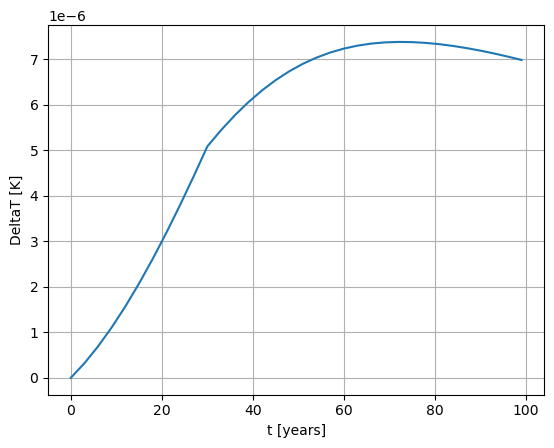

In [33]:
# years = range(0, myaircraft.climateimpact.H+1, 2)  
years = range(0, myaircraft.climateimpact.H+1, 3)  # tempo d'esecuzione: 2m 28s
# years = range(0, myaircraft.climateimpact.H+1, 4)  
DT = np.zeros(len(years))
for i in range(len(years)):
    DT[i] = myaircraft.climateimpact.DeltaT(years[i])
    
np.set_printoptions(precision=6, suppress=False)

plt.plot(years, DT)
plt.grid(visible=True)
plt.xlabel('t [years]')
plt.ylabel('DeltaT [K]')
plt.show()

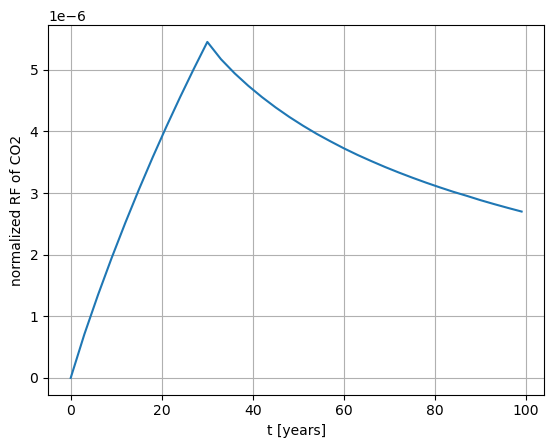

In [34]:
rf_co2 = np.zeros(len(years))
for i in range(len(years)):
    rf_co2[i] = myaircraft.climateimpact.rf_co2(years[i])

plt.plot(years, rf_co2)
plt.grid(visible=True)
plt.xlabel('t [years]')
plt.ylabel('normalized RF of CO2')
plt.show()

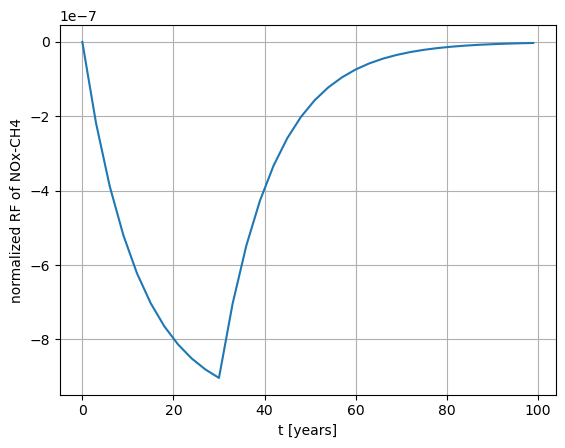

In [35]:
rf_ch4 = np.zeros(len(years))
for i in range(len(years)):
    rf_ch4[i] = myaircraft.climateimpact.rf_ch4(years[i])

plt.plot(years, rf_ch4)
plt.grid(visible=True)
plt.xlabel('t [years]')
plt.ylabel('normalized RF of NOx-CH4')
plt.show()

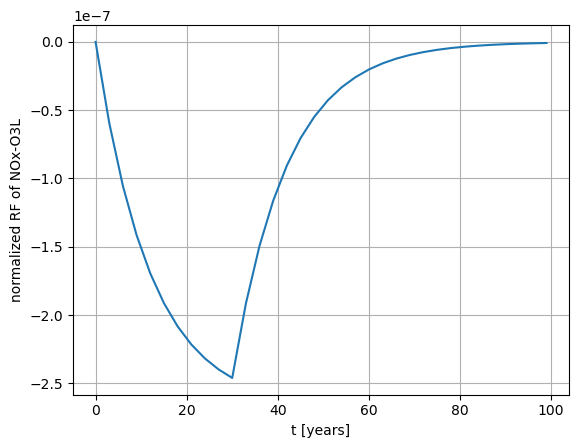

In [36]:
rf_o3l = np.zeros(len(years))
for i in range(len(years)):
    rf_o3l[i] = myaircraft.climateimpact.rf_o3l(years[i])

plt.plot(years, rf_o3l)
plt.grid(visible=True)
plt.xlabel('t [years]')
plt.ylabel('normalized RF of NOx-O3L')
plt.show()

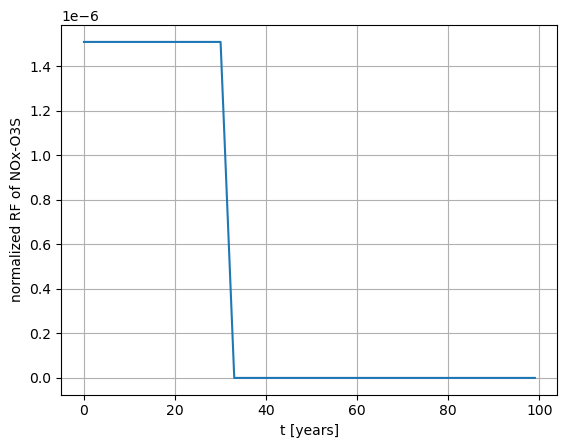

In [37]:
rf_o3s = np.zeros(len(years))
for i in range(len(years)):
    rf_o3s[i] = myaircraft.climateimpact.rf_o3s(years[i])

plt.plot(years, rf_o3s)
plt.grid(visible=True)
plt.xlabel('t [years]')
plt.ylabel('normalized RF of NOx-O3S')
plt.show()

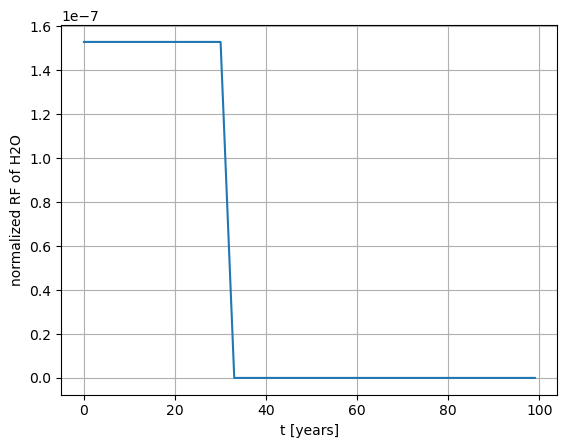

In [38]:
rf_h2o = np.zeros(len(years))
for i in range(len(years)):
    rf_h2o[i] = myaircraft.climateimpact.rf_h2o(years[i])

plt.plot(years, rf_h2o)
plt.grid(visible=True)
plt.xlabel('t [years]')
plt.ylabel('normalized RF of H2O')
plt.show()

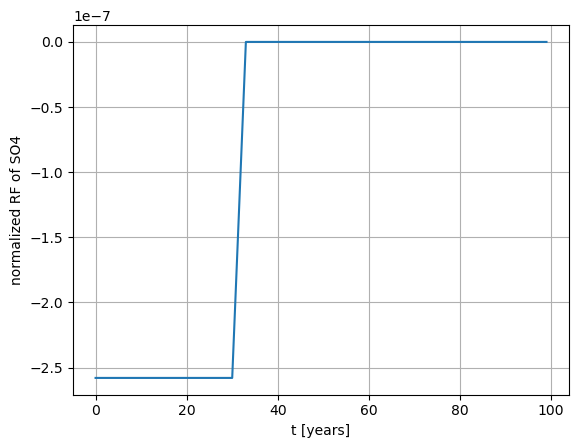

In [39]:
rf_so4 = np.zeros(len(years))
for i in range(len(years)):
    rf_so4[i] = myaircraft.climateimpact.rf_so4(years[i])

plt.plot(years, rf_so4)
plt.grid(visible=True)
plt.xlabel('t [years]')
plt.ylabel('normalized RF of SO4')
plt.show()

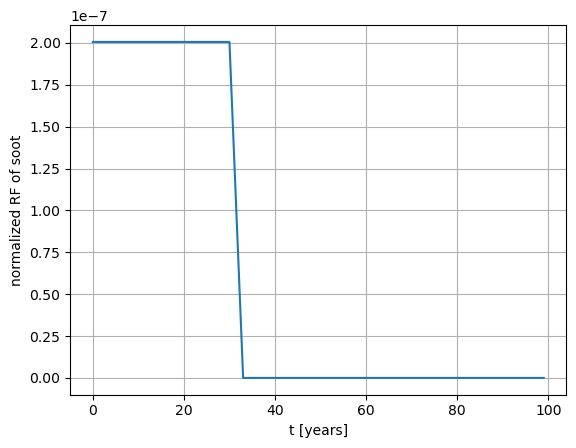

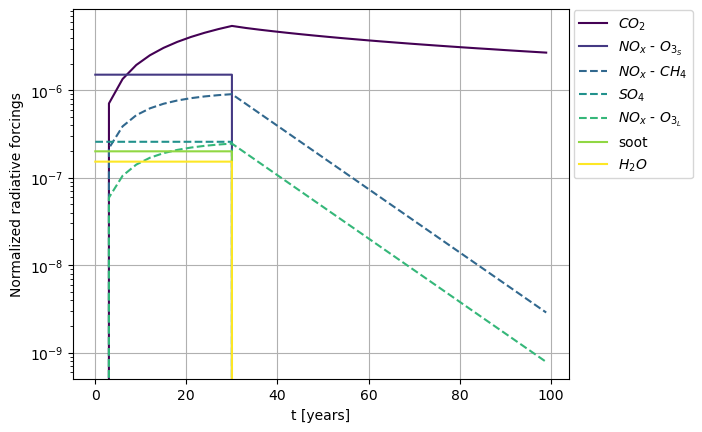

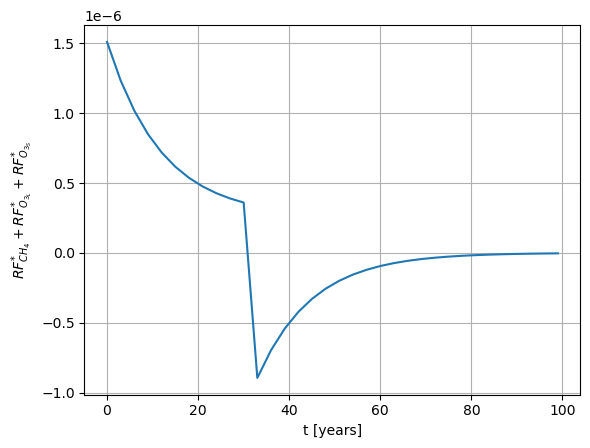

In [46]:
rf_soot = np.zeros(len(years))
for i in range(len(years)):
    rf_soot[i] = myaircraft.climateimpact.rf_soot(years[i])

plt.figure(1)
plt.plot(years, rf_soot)
plt.grid(visible=True)
plt.xlabel('t [years]')
plt.ylabel('normalized RF of soot')
plt.show()

plt.figure(2)
colors = plt.cm.viridis(np.linspace(0, 1, 7))
plt.plot(years, rf_co2, color=colors[0], label='$CO_2$')  
plt.plot(years, rf_o3s, color=colors[1], label='$NO_x$ - $O_{3_S}$')
plt.plot(years, abs(rf_ch4), color=colors[2], linestyle='--', label='$NO_x$ - $CH_4$')  
plt.plot(years, abs(rf_so4), color=colors[3], linestyle='--', label='$SO_4$') 
plt.plot(years, abs(rf_o3l), color=colors[4], linestyle='--', label='$NO_x$ - $O_{3_L}$')  
plt.plot(years, rf_soot, color=colors[5], label='soot')   
plt.plot(years, rf_h2o, color=colors[6], label='$H_2O$')  
plt.yscale('log')
plt.grid(visible=True)
plt.xlabel('t [years]')
plt.ylabel('Normalized radiative forcings')
plt.legend(loc='center', bbox_to_anchor=(1.13, 0.77))
plt.show()

plt.figure(3)
rf_NOx_complessivo = rf_ch4 + rf_o3l + rf_o3s
plt.plot(years, rf_NOx_complessivo)
plt.grid(visible=True)
plt.xlabel('t [years]')
plt.ylabel('$RF^{*}_{CH_4} + RF^{*}_{O_{3_L}} + RF^{*}_{O_{3_S}}$')
plt.show()


In [41]:
def G_xco2(year):
    alpha = np.array([0.1135, 0.152, 0.0970, 0.041])*10**(-12)  # [ppmv/kg(CO2)]
    tau = np.array([313.8, 79.8, 18.8, 1.7])  # [anni]
    G_xco2 = 0.067e-12  # [ppmv/kg(CO2)]
    for i in range(len(alpha)):
        G_xco2 = G_xco2 + alpha[i]*np.exp(-year/tau[i])
    return G_xco2

def DeltaXCO2(year):
    integrand = lambda k: G_xco2(year - k) * myaircraft.climateimpact.E_co2(k)
    result, _ = integrate.quad(integrand, 0, year, epsabs=1e-4, epsrel=1e-3)
    return result

print(DeltaXCO2(10))

0.000676351450009516


In [42]:
times = np.array([])
beta = np.array([])
for array in myaircraft.mission.integral_solution:
    times = np.concatenate([times, array.t])
    beta = np.concatenate([beta, array.y[1]])

v0 = myaircraft.mission.profile.Velocity(times)  # [m/s]
alt = myaircraft.mission.profile.Altitude(times)  # [m]
breakpoint_times = np.zeros(5)
alt_cruise = myaircraft.MissionStages['Cruise']['input']['Altitude']
alt_start_diversion = myaircraft.DiversionStages['Climb1']['input']['StartAltitude']
alt_diversion_cruise = myaircraft.DiversionStages['Cruise']['input']['Altitude']
indices_alt_cruise = np.where(alt == alt_cruise)
breakpoint_times[0] = times[indices_alt_cruise[0][0]]
breakpoint_times[1] = times[indices_alt_cruise[0][-1]]
indices_alt_start_diversion = np.where(alt == alt_start_diversion)
for index in indices_alt_start_diversion[0]:
    if times[index] > breakpoint_times[1]:
        breakpoint_times[2] = times[index]
        break
indices_alt_diversion_cruise = np.where(alt == alt_diversion_cruise)
for index in indices_alt_diversion_cruise[0]:
    if times[index] > breakpoint_times[2]:
        breakpoint_times[3] = times[index]
        break
breakpoint_times[4] = times[indices_alt_diversion_cruise[0][-1]]

print(breakpoint_times/60)

[ 17.7      146.616667 178.1      185.433333 256.683333]


In [43]:
# andamento di EI_NOx durante la missione

times = np.array([])
beta = np.array([])
for array in myaircraft.mission.integral_solution:
    times = np.concatenate([times, array.t])
    beta = np.concatenate([beta, array.y[1]])

v0 = myaircraft.mission.profile.Velocity(times)  # [m/s]
alt = myaircraft.mission.profile.Altitude(times)  # [m]

portata = np.zeros(len(times))  # [kg(fuel)/s]
coeff = np.array([
    [0.7194e+1, 0.5609e+0, -0.1059e-1, -0.3223e+1, 0.2889e+0, 0.2591e+0],
    [0.1605e+0, 0.2412e+0, -0.1650e-2, -0.8818e+1, 0.3714e+2, -0.2268e+0],
    [ 0.3699e+0, 0.5470e+0, -0.7445e-2, -0.6914e+1, 0.6782e+1, 0.1138e+0]
])
# coeff sono i coefficienti del metodo di Filippone per climbout, idle e approach

EI_NOx = np.zeros(len(times))  # [g/kg(fuel)]
dNOx = np.zeros(len(times))  # [g/s]
EI_co2 = 3.16e3 # [g/kg]
dCO2 =  np.zeros(len(times))  # [g/s]
EI_h2o = 1.26e3 # [g/kg]
dH2O = np.zeros(len(times))  # [g/s]
EI_so4 = 2e-1 # [g/kg]
dSO4 = np.zeros(len(times))  # [g/s]
EI_soot = 4e-2 # [kg/kg]
dSoot = np.zeros(len(times))  # [g/s]


OPR = 15.77
                
for t in range(len(times)):
    power = (myaircraft.weight.WTO) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,alt[t],myaircraft.mission.DISA,v0[t],'TAS')
    PRatio = myaircraft.powertrain.Traditional(alt[t],v0[t],power)
    portata[t] = power * PRatio[0]/myaircraft.weight.ef

    if times[t] <= breakpoint_times[0] or (times[t] <= breakpoint_times[3] and times[t] >= breakpoint_times[2]):
        c = coeff[0]
    elif (times[t] > breakpoint_times[0] and times[t] < breakpoint_times[1]) or (times[t] > breakpoint_times[3] and times[t] < breakpoint_times[4]):
        c = coeff[1]
    else:
        c = coeff[2]

    mfuel = 0.5*portata[t]  # portata di combustibile del singolo motore
                        
    EI_NOx[t] =  2*(c[0] + c[1]*OPR + c[2]*(OPR)**2 + c[3]*mfuel + c[4]*(mfuel)**2 + c[5]*OPR*mfuel)
    dNOx[t] = EI_NOx[t]*portata[t]
    dCO2[t] = EI_co2*portata[t]
    dH2O[t] = EI_h2o*portata[t]
    dSO4[t] = EI_so4*portata[t]
    dSoot[t] = EI_soot*portata[t]


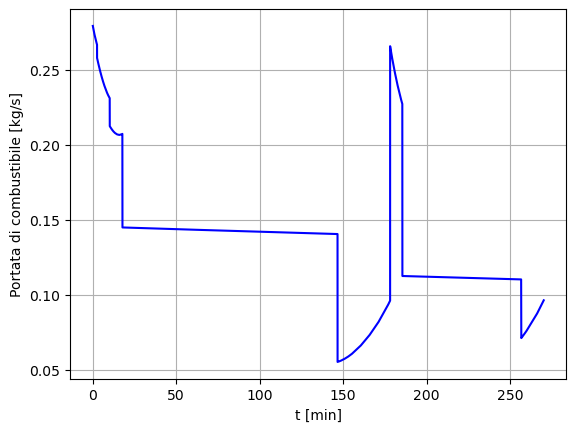

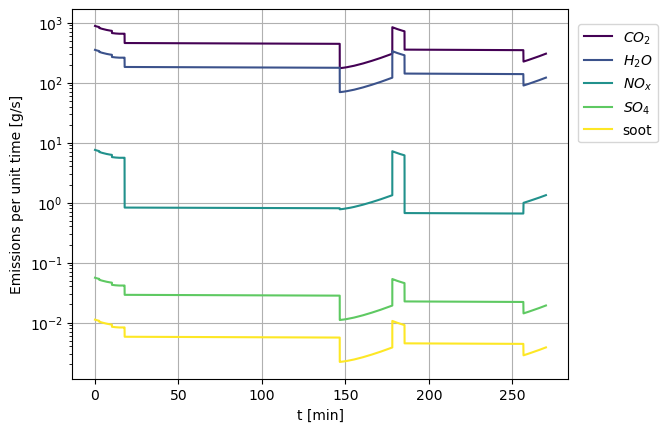

In [44]:
# grafici delle emissioni durante la missione

plt.figure(1)
plt.plot(times/60,portata, 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Portata di combustibile [kg/s]')
plt.show()

plt.figure(2)
colors = plt.cm.viridis(np.linspace(0, 1, 5))
plt.plot(times/60, dCO2, color=colors[0], label='$CO_2$')  
plt.plot(times/60, dH2O, color=colors[1], label='$H_2O$')  
plt.plot(times/60, dNOx, color=colors[2], label='$NO_x$')  
plt.plot(times/60, dSO4, color=colors[3], label='$SO_4$') 
plt.plot(times/60, dSoot, color=colors[4], label='soot') 
plt.yscale('log')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Emissions per unit time [g/s]')
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.8))
plt.show()